In [1]:
import sys, glob, re, codecs, json, re
from gensim import corpora, models, similarities
from gensim.test.utils import get_tmpfile

OUTPUT_FOLDER = '/home/data/all_3_prototype/'
LIKENESS_DEPTH = 'text'

METADATA_FILE_NAME = 'EEBO_metadata.tsv'

LABELS_FILE_NAME = OUTPUT_FOLDER + 'all_eebo.tfidf.' + LIKENESS_DEPTH + '.labels.json'
DICTIONARY_FILE_NAME = OUTPUT_FOLDER + 'all_eebo.tfidf.' + LIKENESS_DEPTH + '.dict'
MM_CORPUS_FILE_NAME = OUTPUT_FOLDER + 'all_eebo.tfidf.' + LIKENESS_DEPTH + '.mm'
TFIDF_CORPUS_FILE_NAME = OUTPUT_FOLDER + 'all_eebo.tfidf.' + LIKENESS_DEPTH + '.tfidf'
INDEX_FILE_NAME = OUTPUT_FOLDER + 'all_eebo.tfidf.' + LIKENESS_DEPTH + '.index'

def load_metadata():

    metadata = {}

    for line in codecs.open(METADATA_FILE_NAME, 'r', encoding='utf-8').read().split('\n'):
        if line.strip() > '' and len(line.strip().split('\t')) > 3:
            cols = line.strip().split('\t')
            metadata[cols[0] + '.xml'] = {'year': cols[1], 'author': cols[2], 'title': cols[3]}

    return metadata

def load_labels_json():

    file_name_labels = json.loads(codecs.open(LABELS_FILE_NAME, 'r', encoding='utf-8').read())

    return file_name_labels

print INDEX_FILE_NAME
print TFIDF_CORPUS_FILE_NAME

/home/data/all_3_prototype/all_eebo.tfidf.text.index
/home/data/all_3_prototype/all_eebo.tfidf.text.tfidf


In [2]:
metadata = load_metadata()
file_name_labels = load_labels_json()

corpus_tfidf = corpora.MmCorpus(TFIDF_CORPUS_FILE_NAME)

TFIDF_TMP_FILE_NAME = '/home/data/all_3_prototype/all_eebo.tfidf.text.TMP.index'

index = similarities.Similarity.load(INDEX_FILE_NAME)
index.output_prefix = TFIDF_TMP_FILE_NAME
index.check_moved()

print 'Loaded!'

Loaded!


In [3]:
import random

NUMBER_OF_FILES_IN_SAMPLE = 1000

file_indexes_to_process = random.sample([x for x in range(0, len(corpus_tfidf))], NUMBER_OF_FILES_IN_SAMPLE)

print 'len(file_indexes_to_process)', len(file_indexes_to_process)

len(file_indexes_to_process) 1000


In [4]:
all_distances = []

for an, a in enumerate(file_indexes_to_process):
    
    if an % 100 == 0:
        print 'processing', an
    
    tfidf_for_a_file = corpus_tfidf[a]
    
    sims = index[tfidf_for_a_file]
    
    for s in sims:
        all_distances.append(s)
        
print 'len(all_distances)', len(all_distances)

processing 0


/home/spenteco/anaconda2/envs/py2/lib/python2.7/site-packages/gensim/similarities/docsim.py:518: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = numpy.hstack(shard_results)


processing 100
processing 200
processing 300
processing 400
processing 500
processing 600
processing 700
processing 800
processing 900
len(all_distances) 60313000


len(all_distances) 60313000


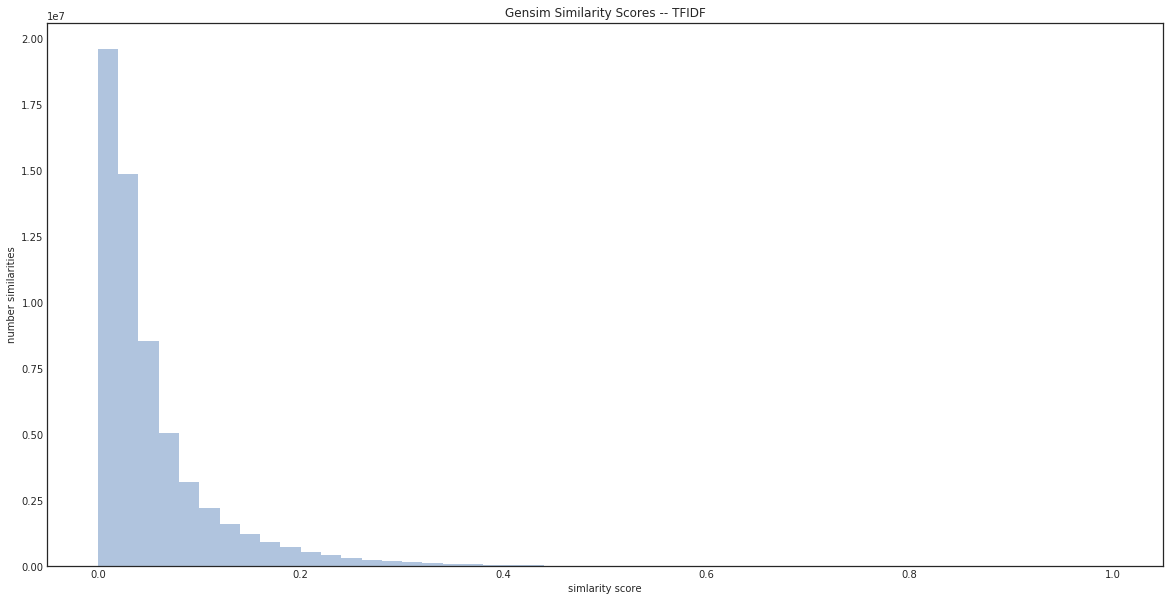

In [5]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

print 'len(all_distances)', len(all_distances)

sns.set_style("white")

plt.figure(figsize=(20, 10))
plt.title('Gensim Similarity Scores -- TFIDF')
plt.ylabel('number similarities')
plt.xlabel('simlarity score')

#ax = sns.distplot(all_distances)
ax = plt.hist(all_distances, bins=50, color='lightsteelblue')

In [7]:
for k, v in metadata.iteritems():
    if 'A97378' in k:
        print k
    if 'A10405' in k:
        print k
    if 'calender' in v['title'].lower() and 'spenser' in v['author'].lower():
        print k
    if 'hydriotaphia' in v['title'].lower() and 'browne' in v['author'].lower():
        print k
    if 'hesperides' in v['title'].lower() and 'herrick' in v['author'].lower():
        print k
    if 'melancholy' in v['title'].lower() and 'burton' in v['author'].low;er():
        print k

A17310.xml
A77689.xml
A10405.xml
A97378.xml
A12782.xml
A29860.xml
A43441.xml


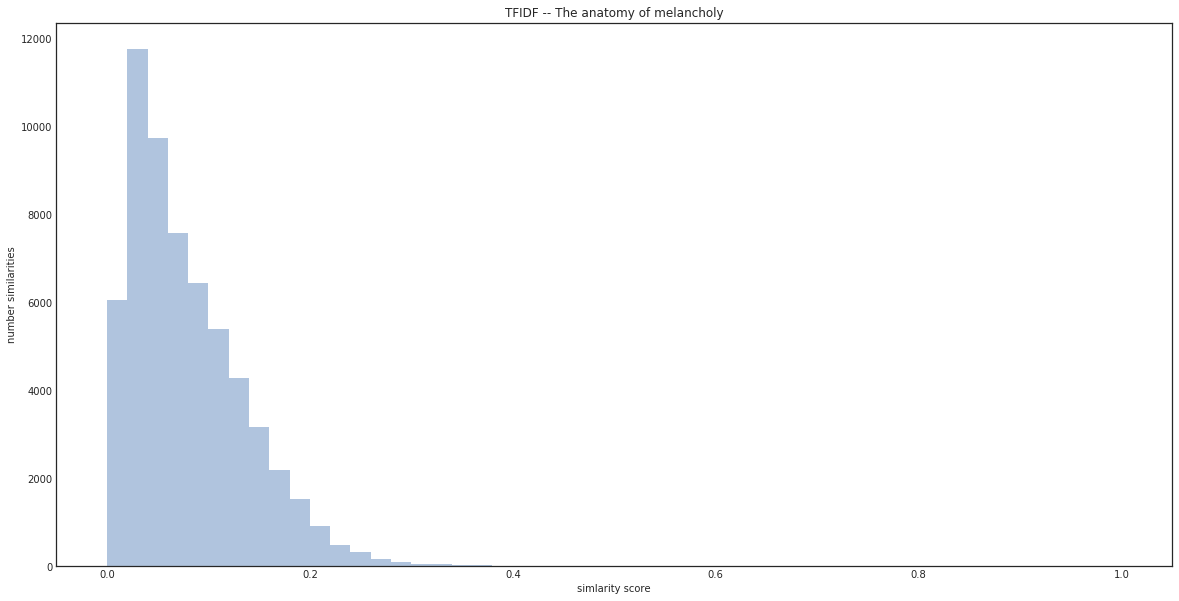

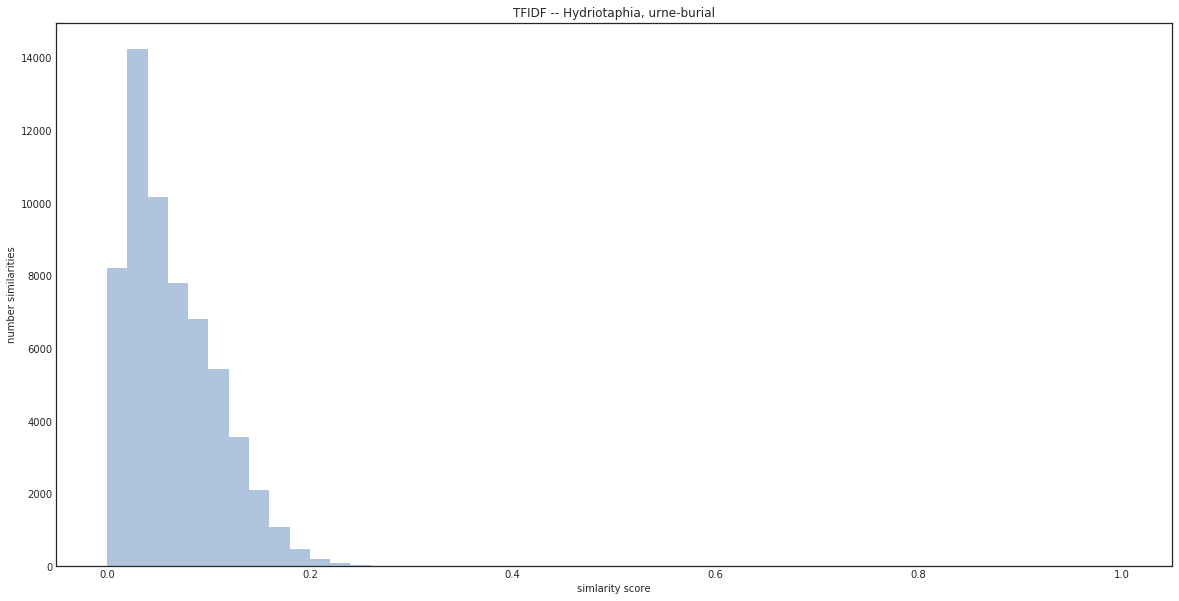

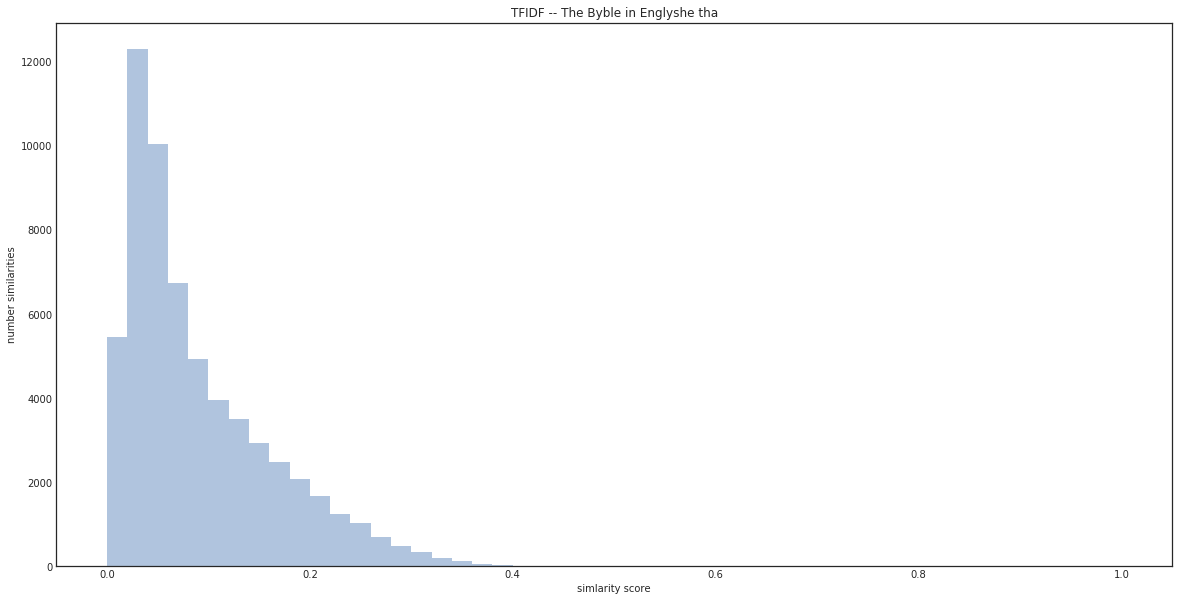

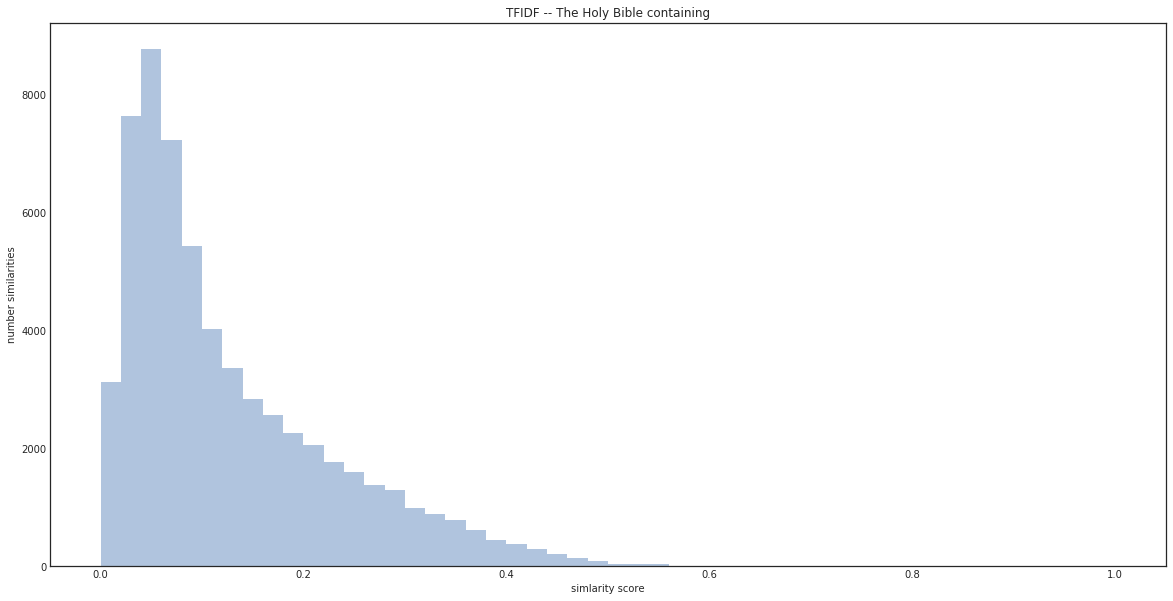

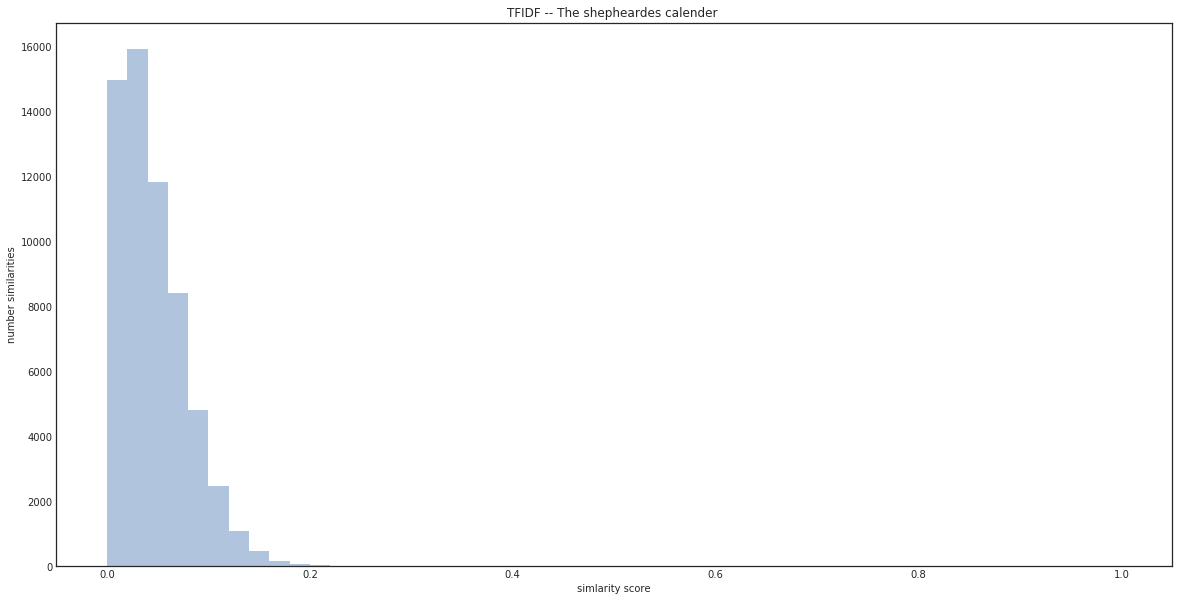

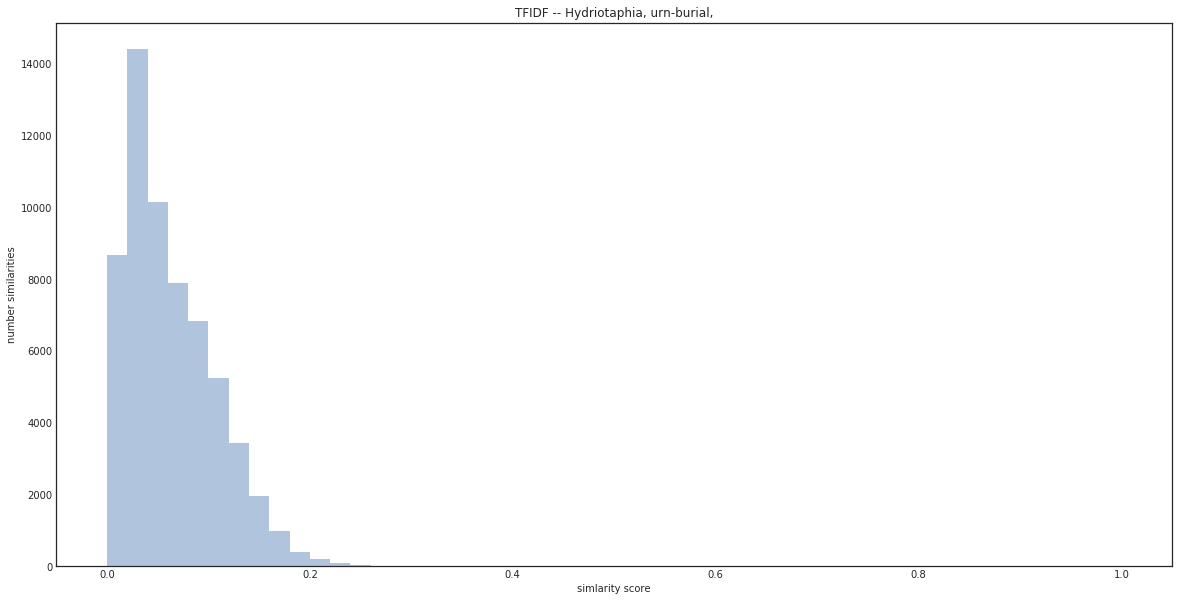

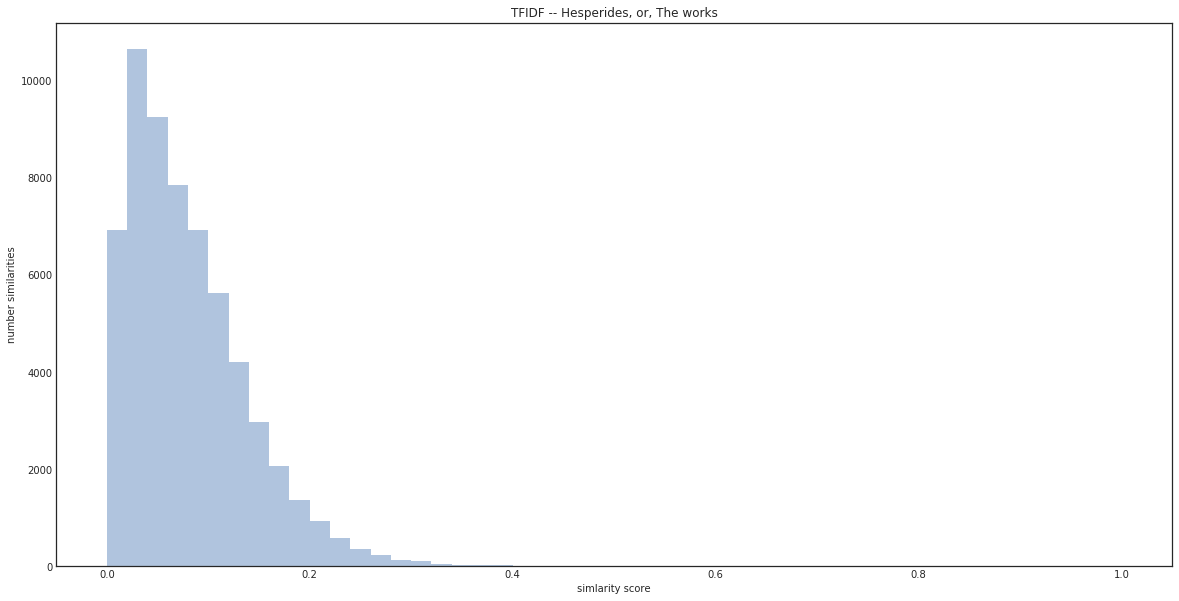

In [20]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

labels = load_labels_json()

for tcp_id in ['A17310', 'A77689', 'A10405', 'A97378', 'A12782', 'A29860', 'A43441']:
    
    m = metadata[tcp_id + '.xml']
    label_index = -1
    for a in range(0, len(labels)):
        if tcp_id + '.xml' == labels[a]:
            label_index = a
            break

    all_distances = []

    tfidf_for_a_file = corpus_tfidf[label_index]

    sims = index[tfidf_for_a_file]

    for s in sims:
        all_distances.append(s)

    sns.set_style("white")

    plt.figure(figsize=(20, 10))
    plt.title('TFIDF -- ' + m['title'][:25])
    plt.ylabel('number similarities')
    plt.xlabel('simlarity score')

    #ax = sns.distplot(all_distances)
    ax = plt.hist(all_distances, bins=50, color='lightsteelblue')
    
    plt.savefig('tfidf.' + tcp_id + '.png')
    
    plt.show()
    


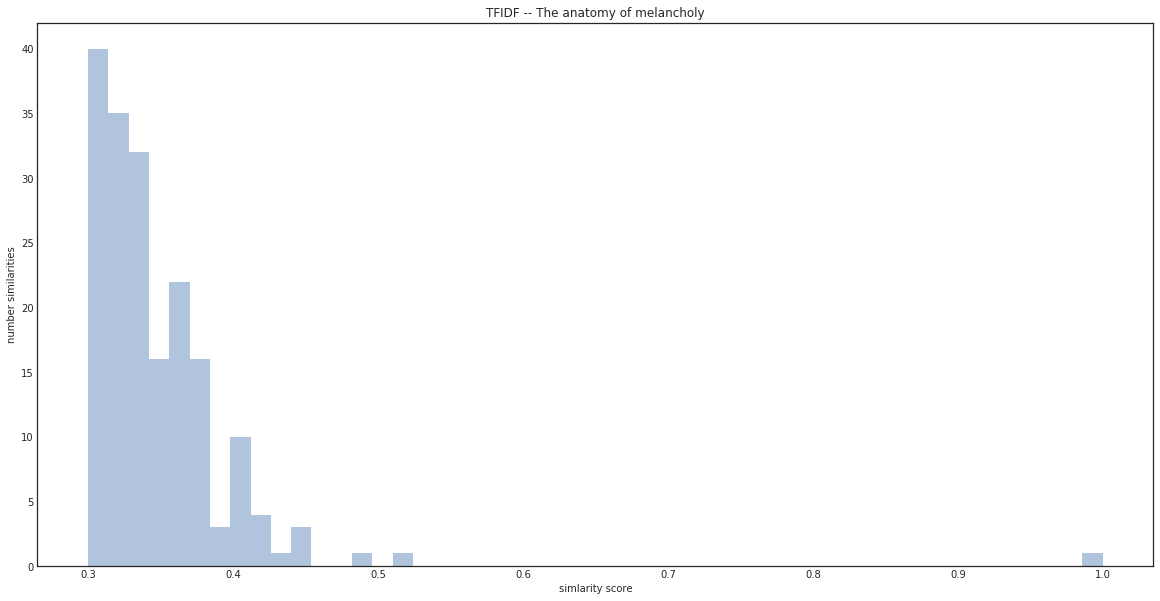

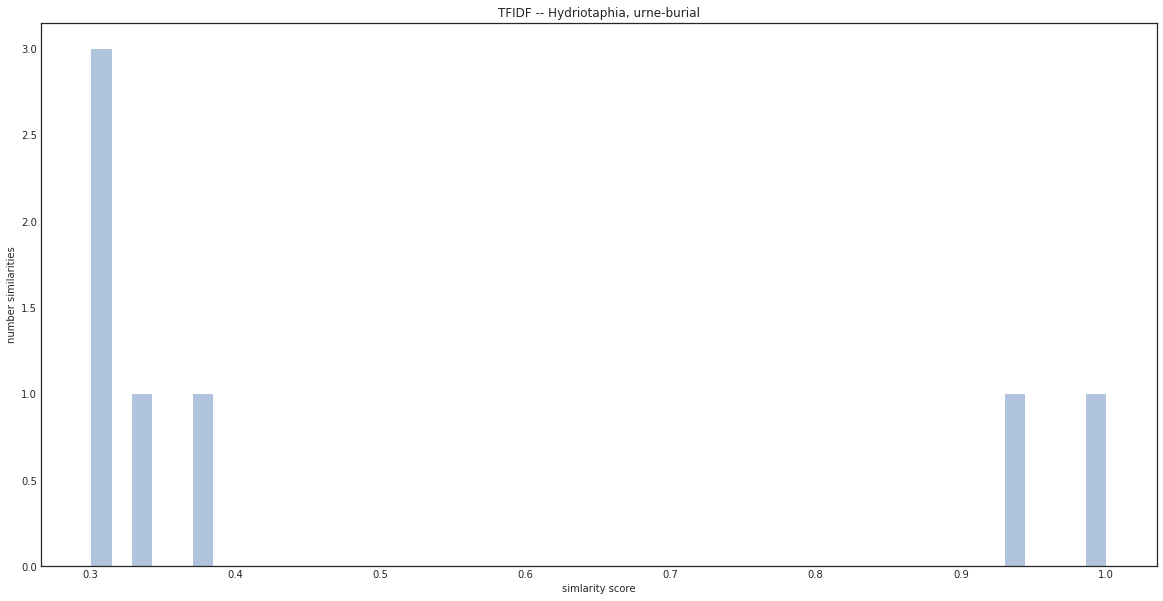

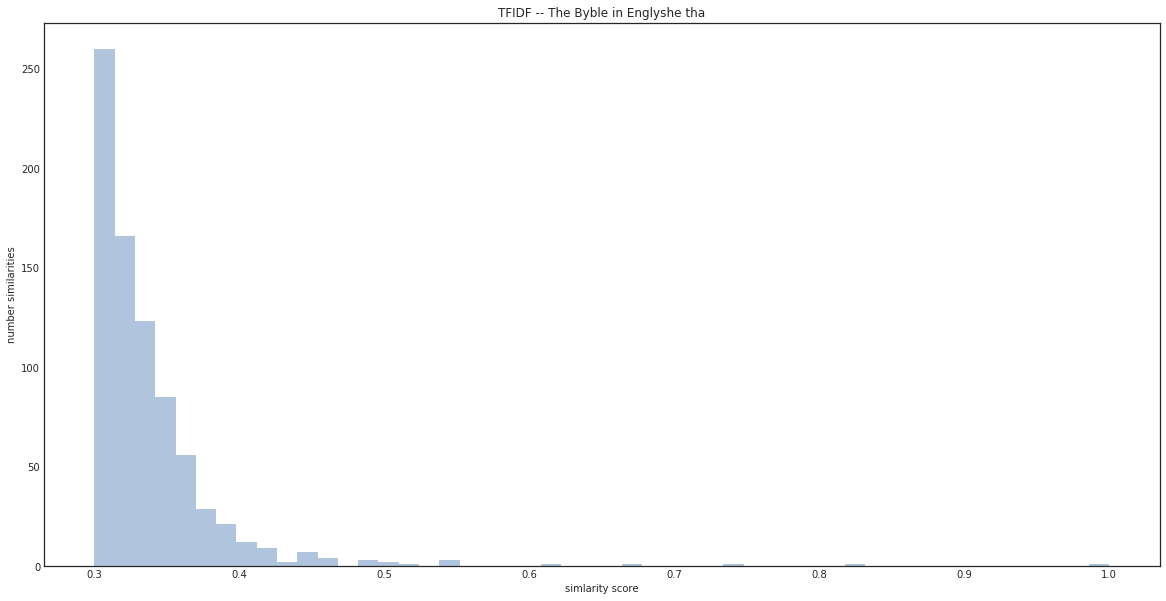

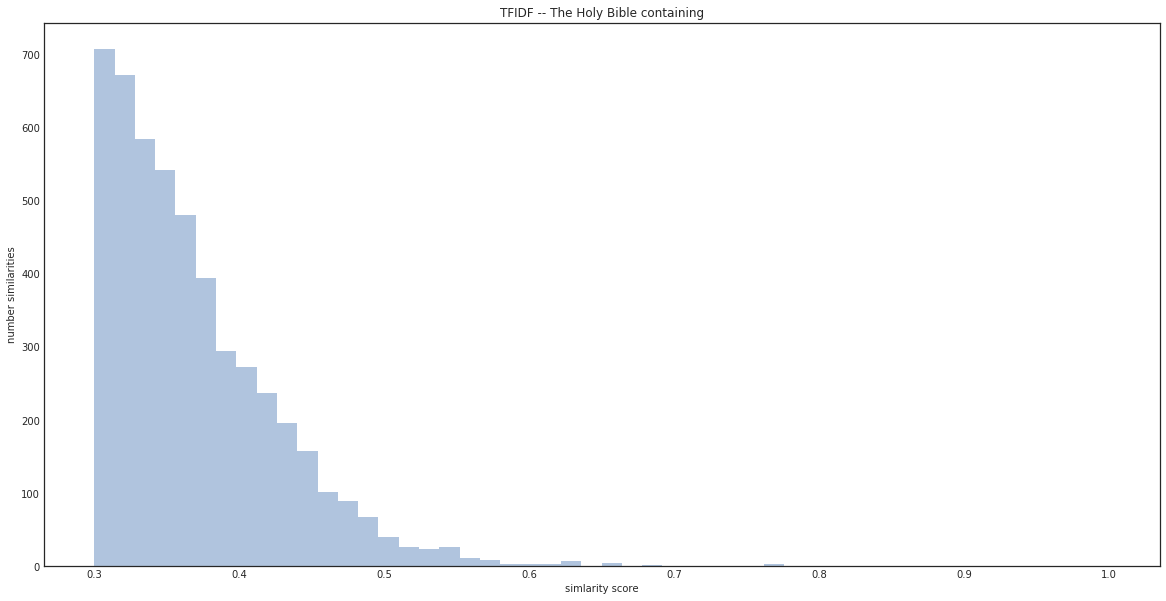

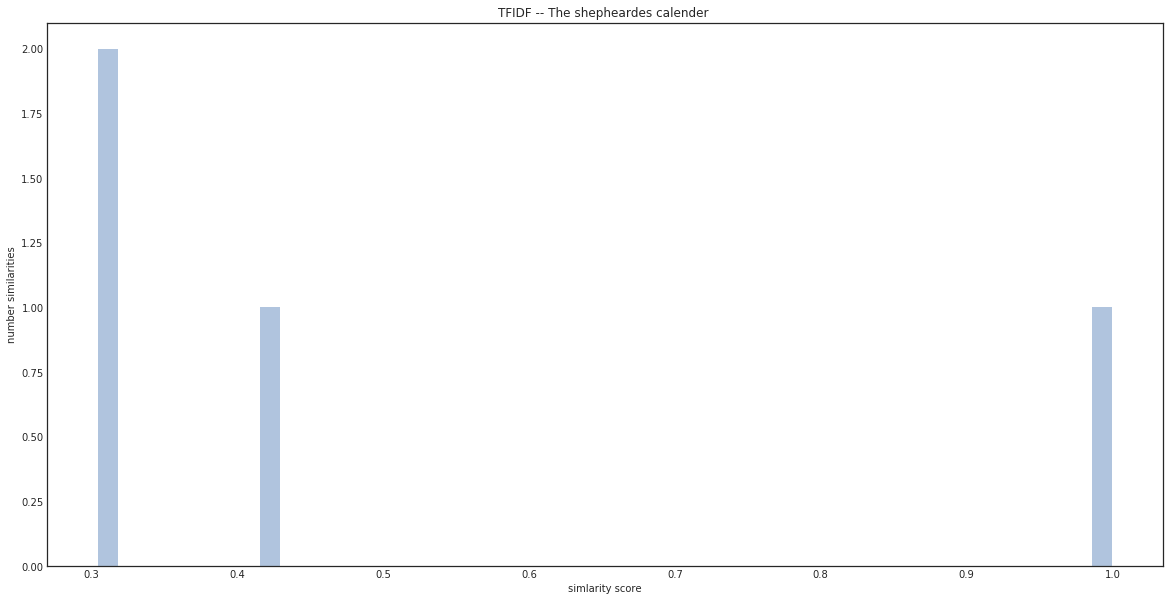

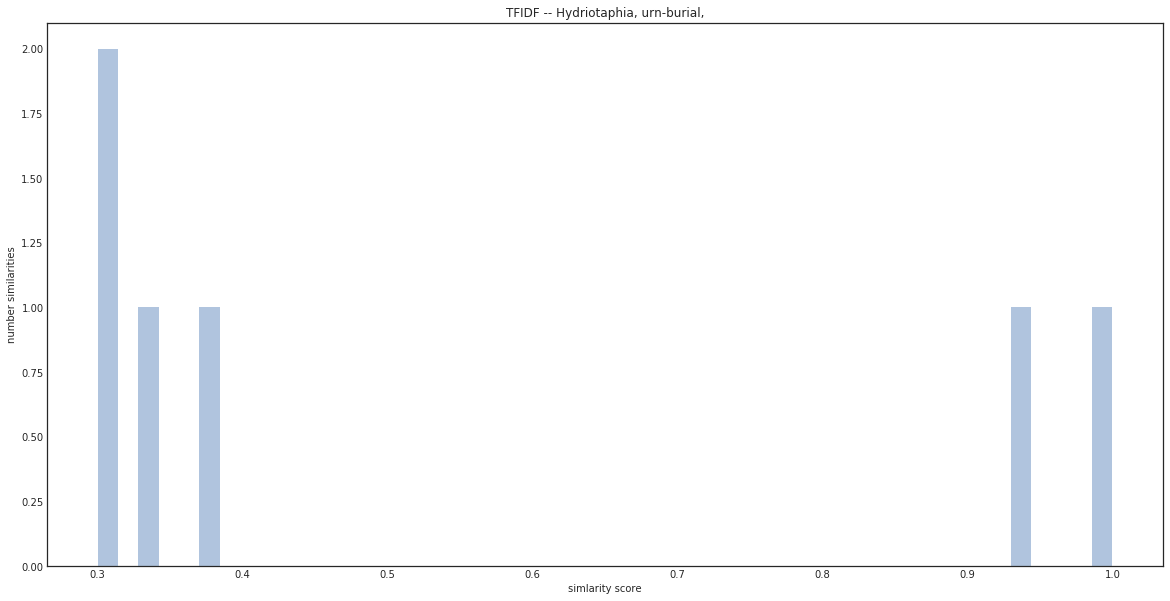

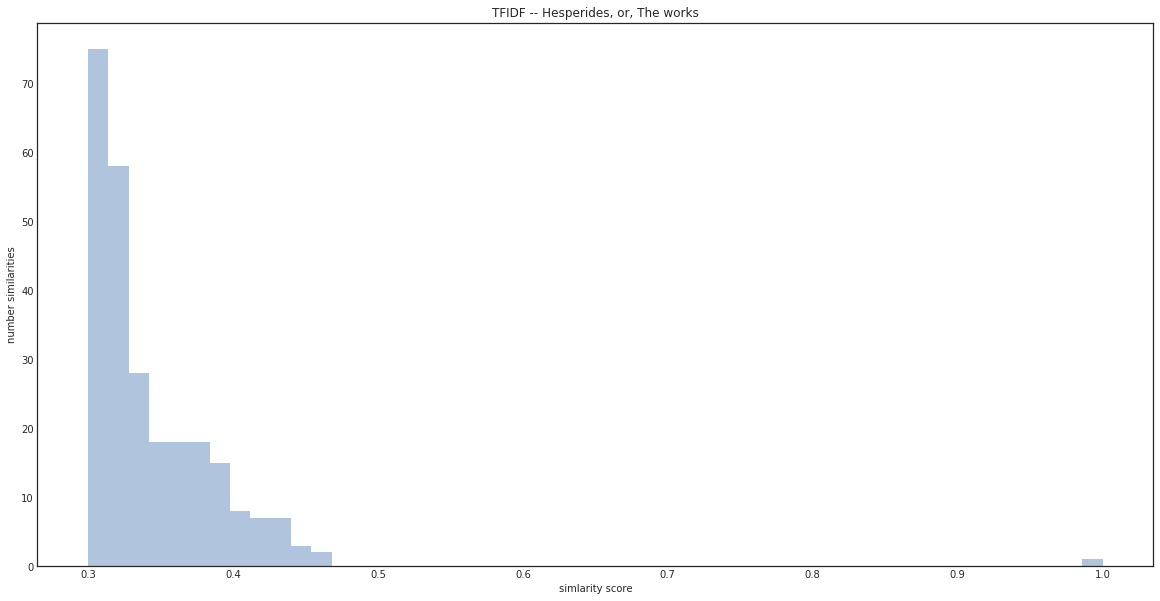

In [21]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

labels = load_labels_json()

for tcp_id in ['A17310', 'A77689', 'A10405', 'A97378', 'A12782', 'A29860', 'A43441']:
    
    m = metadata[tcp_id + '.xml']
    label_index = -1
    for a in range(0, len(labels)):
        if tcp_id + '.xml' == labels[a]:
            label_index = a
            break

    all_distances = []

    tfidf_for_a_file = corpus_tfidf[label_index]

    sims = index[tfidf_for_a_file]

    for s in sims:
        if s >= 0.3:
            all_distances.append(s)

    sns.set_style("white")

    plt.figure(figsize=(20, 10))
    plt.title('TFIDF -- ' + m['title'][:25])
    plt.ylabel('number similarities')
    plt.xlabel('simlarity score')

    #ax = sns.distplot(all_distances)
    ax = plt.hist(all_distances, bins=50, color='lightsteelblue')
    
    plt.savefig('tfidf.GE.0.3.' + tcp_id + '.png')
    
    plt.show()
    
